## Import Packages and Dataset

In [0]:
# import packages
import numpy as np
import pandas as pd
import scipy as sp
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, r2_score, f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter #count resampled data
import statistics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
# conda install -c conda-forge imbalanced-learn
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
# print(os.getcwd())

In [0]:
# import dataset
income = pd.read_csv("income_data.csv", sep=r'\s*,\s*', engine='python')
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Eliminate Rows with Null Values

In [0]:
# checking for '?' values
nullVal = income == '?'
nullVal.values.any()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


True

In [0]:
# replace '?' with 'nan'
income = income.replace('?', np.nan)
income.isnull().values.any()

True

In [0]:
# eliminate all rows with 'nan'
income = income.dropna()
income.reset_index(drop=True)
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Transform Categorical Variables Except for Sex and Income

In [0]:
factors = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'capital-loss', 'capital-gain', 'income']

In [0]:
# checking for the percentage of each level within each categorical variable
count = income['race'].value_counts()
sum(count)
print(income['race'].value_counts() / sum(count))

White                 0.859790
Black                 0.093396
Asian-Pac-Islander    0.029673
Amer-Indian-Eskimo    0.009482
Other                 0.007659
Name: race, dtype: float64


In [0]:
# merging levels of race
income['race']=np.where(income['race'] != 'White', 'Not-White', income['race'])

In [0]:
# checking for the percentage of each level within each categorical variable
count = income['workclass'].value_counts()
sum(count)
print(income['workclass'].value_counts() / sum(count))

Private             0.738877
Self-emp-not-inc    0.082853
Local-gov           0.068530
State-gov           0.042404
Self-emp-inc        0.035608
Federal-gov         0.031265
Without-pay         0.000464
Name: workclass, dtype: float64


In [0]:
# merging levels of Work Class
income['workclass']=np.where(income['workclass'] =='Federal-gov', 'Gov-job', income['workclass'])
income['workclass']=np.where(income['workclass'] =='Local-gov', 'Gov-job', income['workclass'])
income['workclass']=np.where(income['workclass'] =='State-gov', 'Gov-job', income['workclass'])
income['workclass']=np.where(income['workclass'] =='Self-emp-not-inc', 'Self-emp', income['workclass'])
income['workclass']=np.where(income['workclass'] =='Self-emp-inc', 'Self-emp', income['workclass'])
income['workclass']=np.where(income['workclass'] =='Never-worked', 'Never-Worked-and-Without-Pay', income['workclass'])
income['workclass']=np.where(income['workclass'] =='Without-pay', 'Never-Worked-and-Without-Pay', income['workclass'])

In [0]:
# checking for the percentage of each level within each categorical variable
count = income['education'].value_counts()
sum(count)
print(income['education'].value_counts() / sum(count))

HS-grad         0.326238
Some-college    0.221404
Bachelors       0.167230
Masters         0.053942
Assoc-voc       0.043333
11th            0.034746
Assoc-acdm      0.033420
10th            0.027187
7th-8th         0.018467
Prof-school     0.017970
9th             0.015085
12th            0.012499
Doctorate       0.012433
5th-6th         0.009548
1st-4th         0.005006
Preschool       0.001492
Name: education, dtype: float64


In [0]:
# merging levels of education
income['education']=np.where(income['education'] =='11th', 'Not-HS-Grad', income['education'])
income['education']=np.where(income['education'] =='9th', 'Not-HS-Grad', income['education'])
income['education']=np.where(income['education'] =='7th-8th', 'Not-HS-Grad', income['education'])
income['education']=np.where(income['education'] =='5th-6th', 'Not-HS-Grad', income['education'])
income['education']=np.where(income['education'] =='10th', 'Not-HS-Grad', income['education'])
income['education']=np.where(income['education'] =='1st-4th', 'Not-HS-Grad', income['education'])
income['education']=np.where(income['education'] =='Preschool', 'Not-HS-Grad', income['education'])
income['education']=np.where(income['education'] =='12th', 'Not-HS-Grad', income['education'])

In [0]:
# checking for the percentage of each level within each categorical variable
count = income['marital-status'].value_counts()
sum(count)
print(income['marital-status'].value_counts() / sum(count))

Married-civ-spouse       0.466315
Never-married            0.322459
Divorced                 0.139712
Separated                0.031132
Widowed                  0.027419
Married-spouse-absent    0.012267
Married-AF-spouse        0.000696
Name: marital-status, dtype: float64


In [0]:
# merging levels of Marital Status
income['marital-status']=np.where(income['marital-status'] =='Divorced', 'Incomplete-Family', income['marital-status'])
income['marital-status']=np.where(income['marital-status'] =='Married-spouse-absent', 'Complete-Family', income['marital-status'])
income['marital-status']=np.where(income['marital-status'] =='Married-civ-spouse', 'Complete-Family', income['marital-status'])
income['marital-status']=np.where(income['marital-status'] =='Married-AF-spouse', 'Complete-Family', income['marital-status'])
income['marital-status']=np.where(income['marital-status'] =='Never-married', 'Incomplete-Family', income['marital-status'])
income['marital-status']=np.where(income['marital-status'] =='Separated', 'Incomplete-Family', income['marital-status'])
income['marital-status']=np.where(income['marital-status'] =='Widowed', 'Incomplete-Family', income['marital-status'])

In [0]:
# checking for the percentage of each level within each categorical variable
count = income['occupation'].value_counts()
sum(count)
print(income['occupation'].value_counts() / sum(count))

Prof-specialty       0.133877
Craft-repair         0.133612
Exec-managerial      0.132352
Adm-clerical         0.123367
Sales                0.118825
Other-service        0.106492
Machine-op-inspct    0.065181
Transport-moving     0.052119
Handlers-cleaners    0.044758
Farming-fishing      0.032790
Tech-support         0.030237
Protective-serv      0.021351
Priv-house-serv      0.004741
Armed-Forces         0.000298
Name: occupation, dtype: float64


In [0]:
# merging levels of occupation
income['occupation']=np.where(income['occupation'] =='Craft-repair', 'Manual-type-occupation', income['occupation'])
income['occupation']=np.where(income['occupation'] =='Farming-fishing', 'Manual-type-occupation', income['occupation'])
income['occupation']=np.where(income['occupation'] =='Handlers-cleaners', 'Manual-type-occupation', income['occupation'])
income['occupation']=np.where(income['occupation'] =='Transport-moving', 'Manual-type-occupation', income['occupation'])
income['occupation']=np.where(income['occupation'] =='Priv-house-serv', 'Manual-type-occupation', income['occupation'])
income['occupation']=np.where(income['occupation'] =='Protective-serv', 'Manual-type-occupation', income['occupation'])
income['occupation']=np.where(income['occupation'] =='Machine-op-inspct', 'Mixed-type-occupation', income['occupation'])
income['occupation']=np.where(income['occupation'] =='Armed-Forces', 'Mixed-type-occupation', income['occupation'])
income['occupation']=np.where(income['occupation'] =='Other-service', 'Mixed-type-occupation', income['occupation'])
income['occupation']=np.where(income['occupation'] =='Tech-support', 'Intellectual-type-Tech-support', income['occupation'])
income['occupation']=np.where(income['occupation'] =='Exec-managerial', 'Intellectual-type-Exec-managerial', income['occupation'])
income['occupation']=np.where(income['occupation'] =='Adm-clerical', 'Intellectual-type-Exec-managerial', income['occupation'])
income['occupation']=np.where(income['occupation'] =='Sales', 'Intellectual-type-Sales', income['occupation'])
income['occupation']=np.where(income['occupation'] =='Prof-specialty', 'Intellectual-type-Prof-specialty', income['occupation'])

In [0]:
# checking for the percentage of each level within each categorical variable
count = income['relationship'].value_counts()
sum(count)
print(income['relationship'].value_counts() / sum(count))

Husband           0.413202
Not-in-family     0.256150
Own-child         0.148067
Unmarried         0.106492
Wife              0.046615
Other-relative    0.029474
Name: relationship, dtype: float64


In [0]:
# merging levels of relationship
income['relationship']=np.where(income['relationship'] =='Husband', 'In-family-no-child', income['relationship'])
income['relationship']=np.where(income['relationship'] =='Wife', 'In-family-no-child', income['relationship'])

In [0]:
# checking for the percentage of each level within each categorical variable
count = income['native-country'].value_counts()
sum(count)
print(income['native-country'].value_counts() / sum(count))

United-States                 0.911876
Mexico                        0.020224
Philippines                   0.006233
Germany                       0.004244
Puerto-Rico                   0.003614
Canada                        0.003548
India                         0.003315
El-Salvador                   0.003315
Cuba                          0.003050
England                       0.002851
Jamaica                       0.002652
South                         0.002354
China                         0.002254
Italy                         0.002254
Dominican-Republic            0.002221
Vietnam                       0.002122
Guatemala                     0.002089
Japan                         0.001956
Columbia                      0.001857
Poland                        0.001857
Iran                          0.001392
Taiwan                        0.001392
Haiti                         0.001392
Portugal                      0.001127
Nicaragua                     0.001094
Peru                     

In [0]:
# merging levels of native country
income['native-country']=np.where(income['native-country'] != 'United-States', 'Non-US', income['native-country'])

## Transforming Capital-gain and Capital-loss as Categorical Variables

In [0]:
# most of the values of capital-gain is 0
print("counts of each value of capital-gain:\n",income['capital-gain'].value_counts())
print(str(round(income['capital-gain'].value_counts()[0]*100/income.shape[0],2)) + '%')

counts of each value of capital-gain:
 0        27624
15024      337
7688       270
7298       240
99999      148
         ...  
401          1
22040        1
4931         1
1455         1
1639         1
Name: capital-gain, Length: 118, dtype: int64
91.59%


In [0]:
# print the median of non-zero capital-gain
median = income[income['capital-gain'] != 0].median()
print("the median of non-zero capital-gain: ",median['capital-gain'])

the median of non-zero capital-gain:  7298.0


In [0]:
# transform the capital-gain variable
income['capital-gain'] = np.where(((income['capital-gain'] > 0) & (income['capital-gain'] <= median['capital-gain'])), 1, income['capital-gain'])
income['capital-gain'] = np.where(income['capital-gain'] > median['capital-gain'], 2, income['capital-gain'])
income['capital-gain'] = np.where(income['capital-gain'] == 0, '0', income['capital-gain'])
income['capital-gain'] = np.where(income['capital-gain'] == 1, 'low-capital-gain', income['capital-gain'])
income['capital-gain'] = np.where(income['capital-gain'] == 2, 'high-capital-gain', income['capital-gain'])


In [0]:
# most of the values of capital-loss are also 0s
print("counts of each value of capital-loss:\n", income['capital-loss'].value_counts())
print(str(round(income['capital-loss'].value_counts()[0]*100/income.shape[0],2)) + '%')

counts of each value of capital-loss:
 0       28735
1902      194
1977      162
1887      155
1848       50
        ...  
419         1
1411        1
1539        1
2472        1
2467        1
Name: capital-loss, Length: 90, dtype: int64
95.27%


In [0]:
# print the median of non-zero capital-loss
median2 = income[income['capital-loss'] != 0].median()
print("the median of non-zero capital-loss: ", median2['capital-loss'])

the median of non-zero capital-loss:  1887.0


In [0]:
# transform the capital-loss variable
income['capital-loss'] = np.where(((income['capital-loss'] > 0) & (income['capital-loss'] <= median2['capital-loss'])), 1, income['capital-loss'])
income['capital-loss'] = np.where(income['capital-loss'] > median2['capital-loss'], 2, income['capital-loss'])
income['capital-loss'] = np.where(income['capital-loss'] == 0, '0', income['capital-loss'])
income['capital-loss'] = np.where(income['capital-loss'] == 1, 'low-capital-loss', income['capital-loss'])
income['capital-loss'] = np.where(income['capital-loss'] == 2, 'high-capital-loss', income['capital-loss'])


## Checking Bi-variate Correlations

In [0]:
# assigning levels to the values of categorical variables
income_fact = income.copy()
mapping_levels = []
for factor in factors:
    income_fact[factor] = income_fact[factor].factorize(sort = True)[0]
    mapping_levels.append(income_fact[factor].factorize(sort = True)[1])
income_fact.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,2,13,1,0,1,1,1,1,0,40,1,0
1,50,3,83311,2,13,0,0,0,1,1,0,0,13,1,0
2,38,2,215646,4,9,1,4,1,1,1,0,0,40,1,0
3,53,2,234721,6,7,0,4,0,0,1,0,0,40,1,0
4,28,2,338409,2,13,0,1,0,0,0,0,0,40,0,0
5,37,2,284582,5,14,0,0,0,1,0,0,0,40,1,0
6,49,2,160187,6,5,0,5,1,0,0,0,0,16,0,0
7,52,3,209642,4,9,0,0,0,1,1,0,0,45,1,1
8,31,2,45781,5,14,1,1,1,1,0,2,0,50,1,1
9,42,2,159449,2,13,0,0,0,1,1,1,0,40,1,1


In [0]:
#correlation matrix of the data
income_fact.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.001904,-0.076511,-0.049574,0.043526,-0.310553,-0.088522,-0.296958,0.026906,0.081993,0.125732,0.063917,0.101599,0.016259,0.241998
workclass,0.001904,1.000000,-0.009348,0.026974,-0.113982,-0.055916,0.105963,-0.050806,0.081722,0.095307,0.023663,0.005477,0.072108,-0.034017,-0.006858
fnlwgt,-0.076511,-0.009348,1.000000,0.012079,-0.044992,0.028083,0.017380,0.023462,-0.058804,0.025362,-0.003768,-0.009855,-0.022886,-0.083390,-0.008957
education,-0.049574,0.026974,0.012079,1.000000,-0.361705,0.061113,0.113758,0.090323,-0.023398,-0.024121,-0.041788,-0.024179,-0.095605,-0.022665,-0.111392
education-num,0.043526,-0.113982,-0.044992,-0.361705,1.000000,-0.071685,-0.434702,-0.128989,0.052615,0.006157,0.149700,0.087643,0.152522,0.127207,0.335286
marital-status,-0.310553,-0.055916,0.028083,0.061113,-0.071685,1.000000,0.006616,0.739856,-0.097076,-0.426348,-0.124736,-0.084929,-0.221492,0.030453,-0.436142
occupation,-0.088522,0.105963,0.017380,0.113758,-0.434702,0.006616,1.000000,0.027159,-0.049891,0.176025,-0.105338,-0.061159,-0.072313,-0.067367,-0.224285
relationship,-0.296958,-0.050806,0.023462,0.090323,-0.128989,0.739856,0.027159,1.000000,-0.143247,-0.424020,-0.118112,-0.085103,-0.246172,-0.009213,-0.376938
race,0.026906,0.081722,-0.058804,-0.023398,0.052615,-0.097076,-0.049891,-0.143247,1.000000,0.105148,0.028664,0.024972,0.056404,0.192115,0.084735
sex,0.081993,0.095307,0.025362,-0.024121,0.006157,-0.426348,0.176025,-0.424020,0.105148,1.000000,0.069416,0.048307,0.231268,-0.003006,0.216699


## Visualizations And Plots

In [0]:
income_new = income_fact.copy()
income_new = pd.DataFrame(income_new)
X = income_new.iloc[:,0:14]
#X.head()

Y = income_new.iloc[:,-1]
#Y.head()

# Resample the data to make the observation of DV balanced
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print(sorted(Counter(Y_resampled).items()))

[(0, 22654), (1, 22654)]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'High Salary')

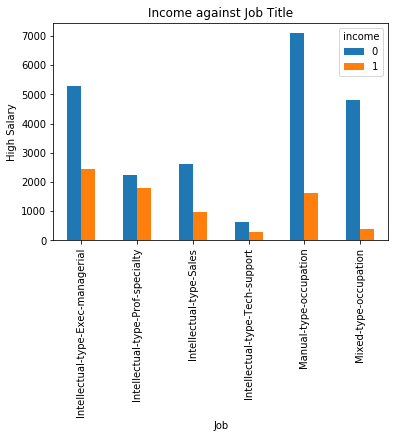

In [0]:
#determining if a variable is good predictor of income through plots
%matplotlib inline
pd.crosstab(income['occupation'],income_new['income']).plot(kind='bar')
plt.title('Income against Job Title')
plt.xlabel('Job')
plt.ylabel('High Salary')


Text(0, 0.5, 'High Salary')

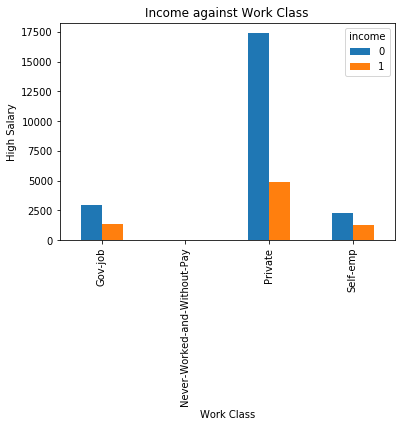

In [0]:

#determining if a variable is good predictor of income through plots
%matplotlib inline
pd.crosstab(income['workclass'],income_new['income']).plot(kind='bar')
plt.title('Income against Work Class')
plt.xlabel('Work Class')
plt.ylabel('High Salary')


Text(0, 0.5, 'High Salary')

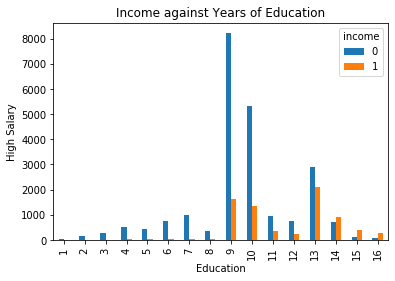

In [0]:
#determining if a variable is good predictor of income through plots
%matplotlib inline
pd.crosstab(income['education-num'],income_new['income']).plot(kind='bar')
plt.title('Income against Years of Education')
plt.xlabel('Education')
plt.ylabel('High Salary')


Text(0, 0.5, 'High Salary')

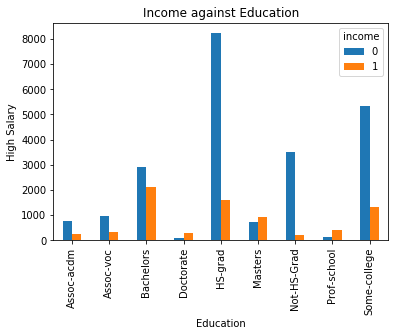

In [0]:
#determining if a variable is good predictor of income through plots
%matplotlib inline
pd.crosstab(income['education'],income_new['income']).plot(kind='bar')
plt.title('Income against Education')
plt.xlabel('Education')
plt.ylabel('High Salary')


Text(0, 0.5, 'High Salary')

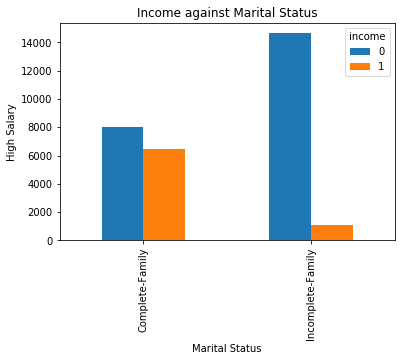

In [0]:

#determining if a variable is good predictor of income through plots
%matplotlib inline
pd.crosstab(income['marital-status'],income_new['income']).plot(kind='bar')
plt.title('Income against Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('High Salary')


Text(0, 0.5, 'High Salary')

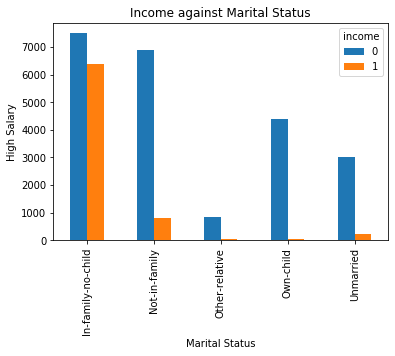

In [0]:
#determining if a variable is good predictor of income through plots
%matplotlib inline
pd.crosstab(income['relationship'],income_new['income']).plot(kind='bar')
plt.title('Income against Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('High Salary')


Text(0, 0.5, 'High Salary')

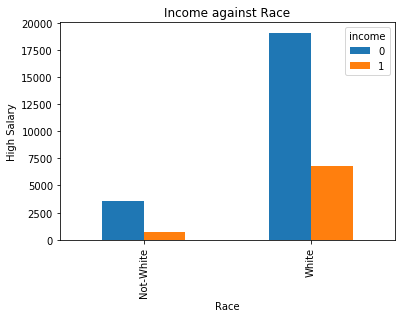

In [0]:

#determining if a variable is good predictor of income through plots
%matplotlib inline
pd.crosstab(income['race'],income_new['income']).plot(kind='bar')
plt.title('Income against Race')
plt.xlabel('Race')
plt.ylabel('High Salary')


Text(0, 0.5, 'High Salary')

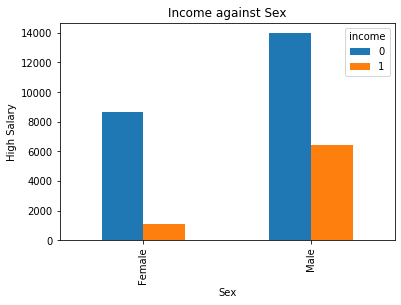

In [0]:

#determining if a variable is good predictor of income through plots
%matplotlib inline
pd.crosstab(income['sex'],income_new['income']).plot(kind='bar')
plt.title('Income against Sex')
plt.xlabel('Sex')
plt.ylabel('High Salary')


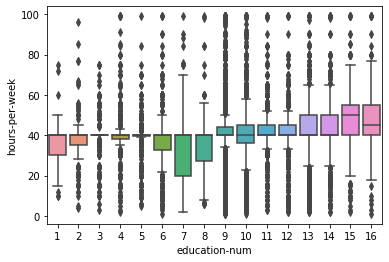

In [0]:
# study interrelationship among other variables
sns.boxplot(x= income['education-num'], y = income['hours-per-week'], data = income )

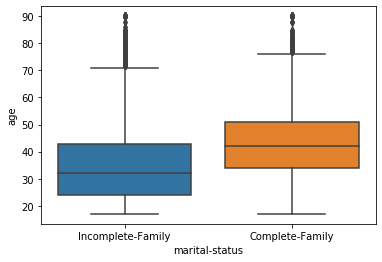

In [0]:
# study interrelationship among other variables
sns.boxplot(x= income['marital-status'], y = income['age'], data = income )

Text(0, 0.5, 'High Salary')

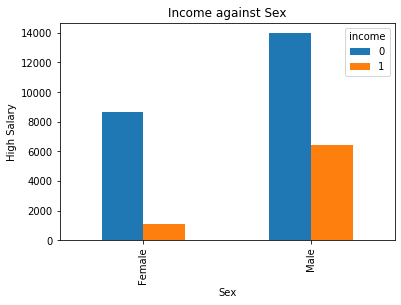

In [0]:
#determining if a variable is good predictor of income through plots
%matplotlib inline
pd.crosstab(income['sex'],income_new['income']).plot(kind='bar')
plt.title('Income against Sex')
plt.xlabel('Sex')
plt.ylabel('High Salary')

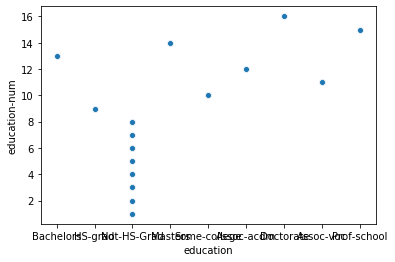

In [0]:
# study interrelationship among other variables
sns.scatterplot(x= income['education'], y = income['education-num'], data = income )

Text(0, 0.5, 'High Salary')

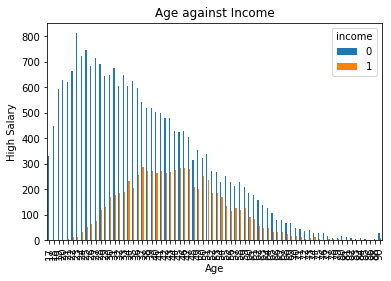

In [0]:
#determining if a variable is good predictor of income through plots
%matplotlib inline
pd.crosstab(income['age'],income_new['income']).plot(kind='bar')
plt.title('Age against Income')
plt.xlabel('Age')
plt.ylabel('High Salary')

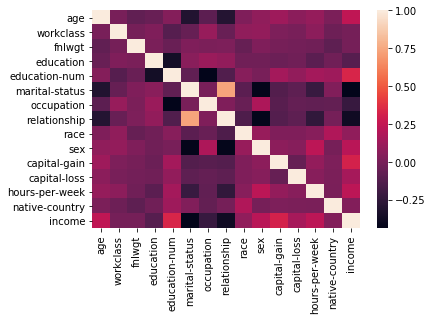

In [0]:
sns.heatmap(income_fact.corr())


In [0]:
sns.pairplot(income_fact)

Error in callback <function flush_figures at 0x7f5b94a7b7b8> (for post_execute):


KeyboardInterrupt: ignored

## Creating Dummy Variables

In [0]:
for var in factors:
    if var != 'income':
        cat_list='var'+'_'+var
        # create dummy variables for the factors and drop the first dummy variable within each factor
        cat_list = pd.get_dummies(income[var], prefix=var, drop_first = True)
        income = pd.concat([income,cat_list], axis = 1)
        income = income.drop(var, 1)
income.head()


KeyError: ignored

In [0]:
# print(income.columns)

## Test-Training Set Split and Handling Imbalanced Dataset

In [0]:
# checking for class imbalance
print(income['income'].value_counts())
print(str(round(income['income'].value_counts()[1]*100/income.shape[0],2)) + '%')

<=50K    22654
>50K      7508
Name: income, dtype: int64
24.89%


In [0]:
# split the dataset into training dataset (70%) and testing dataset (30%)
income = income.reindex()
income['income'] = income['income'].factorize()[0]
np.random.seed(123)
pts = np.random.rand(len(income)) < 0.7

income_train = income[pts]
income_test = income[~pts]

# training datasets
X_train = income_train.copy()
X_train = X_train.drop('income', 1)
Y_train = income_train['income']

# test datasets
X_test = income_test.copy()
X_test = X_test.drop('income', 1)
Y_test = income_test['income']


## Centralize the Data and Use Centralized Data to Fit Full Model

In [0]:
X_mean = X_train.mean()
X_std = X_train.std()


In [0]:
# as the variance among the dependent variables are severely large
# we centralize the data first
X_train_centerized = (X_train - X_mean)/X_std
X_test_centerized = (X_test - X_mean)/X_std

In [0]:
# fitting the model with train dataset without balancing the data
logreg = LogisticRegression()
logreg.fit(X_train_centerized, Y_train)
# generating confusion matrix
Y_pred = logreg.predict(X_test_centerized)
cfmatrix = metrics.confusion_matrix(Y_test, Y_pred)
print("Fitting the model without balancing the classes:")
print(cfmatrix)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))
print("R2 score:", r2_score(Y_test, Y_pred))
print("F1 score:", f1_score(Y_test, Y_pred))




Fitting the model without balancing the classes:
[[6317  503]
 [ 923 1294]]
Accuracy: 0.8422042713289809
Precision: 0.7200890372843628
Recall: 0.5836716283265674
R2 score: 0.14769754377332156
F1 score: 0.6447433981066267


In [0]:
# fitting the model with train dataset with balanced data 
balanced_logreg = LogisticRegression(class_weight = 'balanced')
balanced_logreg.fit(X_train_centerized, Y_train)
# generating confusion matrix
Y_pred = balanced_logreg.predict(X_test_centerized)
cfmatrix = metrics.confusion_matrix(Y_test, Y_pred)
print("Fitting the model with balancing the classes:")
print(cfmatrix)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("R2 score:", r2_score(Y_test, Y_pred))
print("F1 score:", f1_score(Y_test, Y_pred))


Fitting the model with balancing the classes:
[[5424 1396]
 [ 334 1883]]
Accuracy: 0.8085647891999558
Precision: 0.5742604452577005
Recall: 0.8493459630130807
R2 score: -0.033999473542884795
F1 score: 0.6852256186317321


## Feature Elimination using RFE

In [0]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [0]:
rfecv = RFECV(estimator=balanced_logreg, step=1, cv=StratifiedKFold(10), scoring='f1')
rfecv.fit(X_train_centerized, Y_train )

print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 31


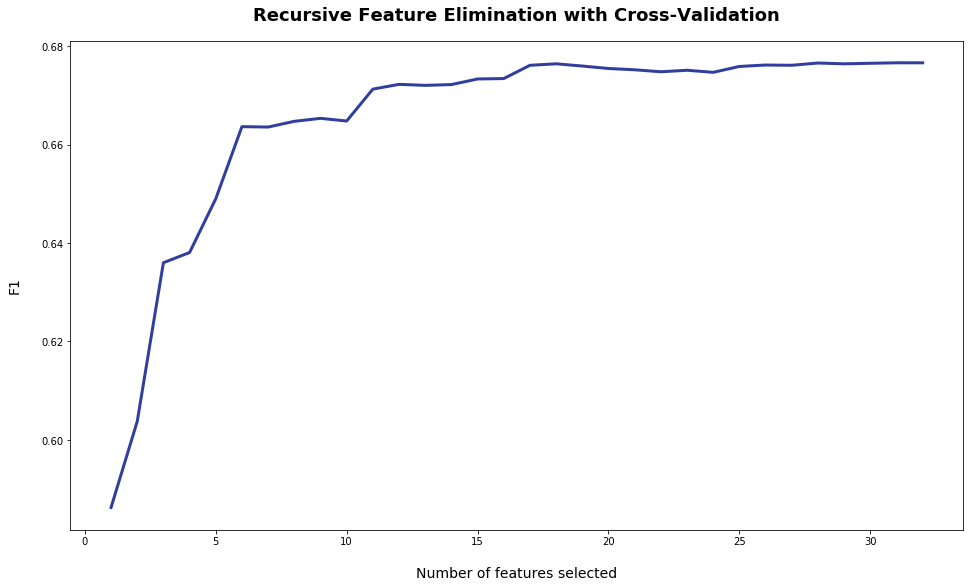

In [0]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('F1', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [0]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 31


In [0]:
rfecv.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [0]:
X_train

,age,fnlwgt,education-num,hours-per-week,workclass_Never-Worked-and-Without-Pay,workclass_Private,workclass_Self-emp,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Not-HS-Grad,education_Prof-school,education_Some-college,marital-status_Incomplete-Family,occupation_Intellectual-type-Prof-specialty,occupation_Intellectual-type-Sales,occupation_Intellectual-type-Tech-support,occupation_Manual-type-occupation,occupation_Mixed-type-occupation,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,race_White,sex_Male,native-country_United-States,capital-loss_1,capital-loss_2,capital-gain_1,capital-gain_2
0,39,77516,13,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0
1,50,83311,13,13,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
2,38,215646,9,40,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0
3,53,234721,7,40,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
5,37,284582,14,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,38,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
32557,40,154374,9,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0
32558,58,151910,9,40,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
32559,22,201490,9,20,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0


In [0]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
# print out the names of features that were selected by RFE
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols, query_cols, sorter = sidx)]

feature_index = []
features = []
column_index(X_train, X_train.columns.values)

for num, i in enumerate(rfecv.support_, start=0):
    if i == True:
        feature_index.append(str(num))

for num, i in enumerate(X_train_centerized.columns.values, start=0):
    if str(num) in feature_index:
        features.append(X_train_centerized.columns.values[num])

print("Features Selected: {}\n".format(len(feature_index)))
print("Features Indexes: \n{}\n".format(feature_index))
print("Feature Names: \n{}".format(features))

Features Selected: 31

Features Indexes: 
['0', '1', '2', '3', '4', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']

Feature Names: 
['age', 'fnlwgt', 'education-num', 'hours-per-week', 'workclass_Never-Worked-and-Without-Pay', 'workclass_Self-emp', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Not-HS-Grad', 'education_Prof-school', 'education_Some-college', 'marital-status_Incomplete-Family', 'occupation_Intellectual-type-Prof-specialty', 'occupation_Intellectual-type-Sales', 'occupation_Intellectual-type-Tech-support', 'occupation_Manual-type-occupation', 'occupation_Mixed-type-occupation', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'race_White', 'sex_Male', 'native-country_United-States', 'capital-loss_1', 'capital-loss_2', 'capital-gain

In [0]:
X_train_centerized_reduced = X_train_centerized[features]
X_test_centerized_reduced = X_test_centerized[features]

In [0]:
# fitting the model with the reduced train dataset without balancing the data
reduced_logreg = LogisticRegression()
reduced_logreg.fit(X_train_centerized_reduced, Y_train)
# generating confusion matrix
Y_pred = reduced_logreg.predict(X_test_centerized_reduced)
cfmatrix = metrics.confusion_matrix(Y_test, Y_pred)
print("Fitting the reduced model without balancing the classes:")
print(cfmatrix)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))
print("R2 score:", r2_score(Y_test, Y_pred))
print("F1 score:", f1_score(Y_test, Y_pred))


Fitting the reduced model without balancing the classes:
[[6316  504]
 [ 925 1292]]
Accuracy: 0.8418723027553392
Precision: 0.7193763919821826
Recall: 0.5827695083446098
R2 score: 0.14590448110243792
F1 score: 0.6439073012708696


In [0]:
# fitting the model with train dataset with balanced data 
balanced_reduced_logreg = LogisticRegression(class_weight = 'balanced')
balanced_reduced_logreg.fit(X_train_centerized_reduced, Y_train)
# generating confusion matrix
Y_pred = balanced_reduced_logreg.predict(X_test_centerized_reduced)
cfmatrix = metrics.confusion_matrix(Y_test, Y_pred)
print("Fitting the model with balancing the classes:")
print(cfmatrix)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("R2 score:", r2_score(Y_test, Y_pred))
print("F1 score:", f1_score(Y_test, Y_pred))

Fitting the model with balancing the classes:
[[5425 1395]
 [ 334 1883]]
Accuracy: 0.8086754453911696
Precision: 0.5744356314826113
Recall: 0.8493459630130807
R2 score: -0.03340178598592369
F1 score: 0.6853503184713375


# Regress Working hours on the rest of the data

In [0]:
X_train_centerized = X_train

X_test_centerized = X_test

# Regress Working hours on the rest of the data

X_test_centerized.head()

## FULL MODEL

# use Statsmodels to regress (OLS)
X_wh = sm.add_constant(X_train_centerized)
model_wh = sm.OLS(y_train, X_wh)
results_wh = model_wh.fit()
print(results_wh.summary())

#collect p-values
pvals_wh = results_wh.pvalues[:]

# use FDR to reduce variables
          ###### for reference ######
# alpha : probability of rejecting true hypothesis for one test
# methods: `fdr_i`, `fdr_bh` : Benjamini/Hochberg  (non-negative) ; 
#          `fdr_n`, `fdr_by` : Benjamini/Yekutieli (negative)
#          'fdr_tsbh' : two stage fdr correction (Benjamini/Hochberg); 
#          'fdr_tsbky' : two stage fdr correction (Benjamini/Krieger/Yekutieli);
#          'fdr_gbs' : adaptive step-down fdr correction (Gavrilov, Benjamini, Sarkar)
import statsmodels.stats.multitest as smm
rej, pval_corr = smm.multipletests(pvals_wh, alpha=0.05, method='fdr_gbs')[:2]

fdr_results = {'variables': X_wh.columns, 'corrected_pvals': pval_corr, 'rej': rej}
fdr_results = pd.DataFrame(fdr_results)  
fdr_results



#import VIF package to check multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X_wh.values, i) 
               for i in range(X_wh.shape[1])], 
              index=X_wh.columns)

#checking multi-collinearity

#remove multi-collinearity by removing education categories and relationship categories
X_wh_reduced=X_wh.drop(["relationship_Own-child","relationship_Unmarried","relationship_Not-in-family","relationship_Other-relative","fnlwgt","education_Assoc-voc","education_Bachelors","education_Doctorate","education_HS-grad","education_Masters","education_Not-HS-Grad","education_Prof-school","education_Some-college"],axis=1)

for col in X_wh_reduced.columns:
    print(col)


#Based on FDR results of full model, race, capital gain and capital loss are also insignficant
#Therefore, removing them 
X_wh_reduced=X_wh_reduced.drop(["race_White","capital-loss_1","capital-loss_2","capital-gain_1","capital-gain_2"],axis=1)

for col in X_wh_reduced.columns:
    print(col)

#Regressing response variable on reduced set of predictors
model_wh_reduced = sm.OLS(y_wh, X_wh_reduced)
results_wh_reduced = model_wh_reduced.fit()
print(results_wh_reduced.summary())

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Full Model - sklearn

fm = LinearRegression()  
fm.fit(X_train_centerized, y_train)

pd.DataFrame(fm.coef_, X_train_centerized.columns, columns=['Coefficient'])  


fm.score(X_train_centerized,y_train)

y_pred_fm = fm.predict(X_test_centerized)

df_fm = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_fm})
df1 = df_fm.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Observation Number")
plt.ylabel("Work hours")
plt.title("Actual vs Predicted Values")
plt.show()

from sklearn.metrics import r2_score, f1_score
r2_test_fm=r2_score(Y_test, y_pred_fm)
r2_test_fm


f1_test_fm=f1_score(Y_test.round(), y_pred_fm.round(),average='micro')
f1_test_fm
#"relationship_Own-child","relationship_Unmarried","relationship_Not-in-family","relationship_Other-relative","fnlwgt",

# Reduced model sklearn

X_train_reduced=X_train_centerized.drop(["education_Assoc-voc","education_Bachelors","education_Doctorate","education_HS-grad","education_Masters","education_Not-HS-Grad","education_Prof-school","education_Some-college","race_White","capital-loss_1","capital-loss_2","capital-gain_1","capital-gain_2"],axis=1)

X_test_reduced=X_test_centerized.drop(["education_Assoc-voc","education_Bachelors","education_Doctorate","education_HS-grad","education_Masters","education_Not-HS-Grad","education_Prof-school","education_Some-college","race_White","capital-loss_1","capital-loss_2","capital-gain_1","capital-gain_2"],axis=1)

rm = LinearRegression()  
rm.fit(X_train_reduced, y_train)

rm.score(X_train_reduced,y_train)

pd.DataFrame(rm.coef_, X_train_reduced.columns, columns=['Coefficient'])  

y_pred_rm = rm.predict(X_test_reduced)

r2_test_rm=r2_score(Y_test, y_pred_rm)
r2_test_rm

f1_test_rm=f1_score(Y_test.round(), y_pred_rm.round(),average='micro')
f1_test_rm



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


NameError: ignored

In [0]:
#adding interaction

In [0]:
name = ['Age','Workclass','Fnlwgt','Education','EduNum','MaritalStatus','Occupation','Relationship','Race','Sex','CapGain','CapLoss','Country','Income']
X_train_wh.columns = name
X_train_wh.head()

,Age,Workclass,Fnlwgt,Education,EduNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapGain,CapLoss,Country,Income
0,39,0,77516,2,13,1,0,1,1,1,1,0,1,0
1,50,3,83311,2,13,0,0,0,1,1,0,0,1,0
2,38,2,215646,4,9,1,4,1,1,1,0,0,1,0
3,53,2,234721,6,7,0,4,0,0,1,0,0,1,0
4,28,2,338409,2,13,0,1,0,0,0,0,0,0,0


In [0]:
# create the training data
X_train_wh['WorkingHours'] = y_train_wh
income_train_wh = X_train_wh

In [0]:
# check the training data
income_train_wh.head()

,Age,Workclass,Fnlwgt,Education,EduNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapGain,CapLoss,Country,Income,WorkingHours
0,39,0,77516,2,13,1,0,1,1,1,1,0,1,0,40
1,50,3,83311,2,13,0,0,0,1,1,0,0,1,0,13
2,38,2,215646,4,9,1,4,1,1,1,0,0,1,0,40
3,53,2,234721,6,7,0,4,0,0,1,0,0,1,0,40
4,28,2,338409,2,13,0,1,0,0,0,0,0,0,0,40


In [0]:
# assessing interactions in interested attributes
from patsy import dmatrices
y_int, X_int = dmatrices('WorkingHours ~ Age + Workclass + EduNum + Occupation + MaritalStatus + Sex + Income + Age:Workclass + Sex:EduNum + Age:Relationship + Income:Workclass + MaritalStatus:Sex', 
                         data = income_train_wh, return_type = 'dataframe')
# fit the linear regression model
model_wh_int = sm.OLS(y_int, X_int)
regression_wh_int = model_wh_int.fit()
print(regression_wh_int.summary())

                            OLS Regression Results                            
Dep. Variable:           WorkingHours   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     227.0
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:47:09   Log-Likelihood:                -81154.
No. Observations:               21122   AIC:                         1.623e+05
Df Residuals:                   21109   BIC:                         1.624e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            24.1182      1.00

In [0]:
# for the test data, conduct the some transformation in order to test the model
X_test_wh.columns = name
X_test_wh.head()
X_test_wh['WorkingHours'] = Y_test_wh
income_test_wh = X_test_wh

In [0]:
# get the variables for model testing
y_int_test, X_int_test = dmatrices('WorkingHours ~ Age + Workclass + EduNum + Occupation + MaritalStatus + Sex + Income + Age:Workclass + Sex:EduNum + Age:Relationship + Income:Workclass + MaritalStatus:Sex', 
                         data = income_test_wh, return_type = 'dataframe')

In [0]:
# predict the values of dependent variable
y_int_pred = regression_wh_int.predict(X_int_test)

In [0]:
# compute OOS R2
from sklearn.metrics import r2_score, f1_score
r2_score(Y_test_wh, y_int_pred)

0.10866197102853625

# Adding interaction items

Here, in order to use dmatrices, need to first transform colnames to eliminate "-"s

In [0]:
name = ['Age','Workclass','Fnlwgt','Education','EduNum','MaritalStatus','Occupation','Relationship','Race','Sex','CapGain','CapLoss','WorkHour','Country','Income']
income_fact.columns = name
income_fact.head()

In [0]:
# assessing interactions in interested attributes
from patsy import dmatrices
y_int, X_int = dmatrices('WorkHour ~ Age + Workclass + EduNum + Occupation + Relationship + Sex + CapGain + CapLoss + Age:Workclass + Sex:EduNum + Age:Relationship + EduNum:Workclass + MaritalStatus:Sex', data = income_fact, 
                         return_type = 'dataframe')
model_wh_int = sm.OLS(y_int, X_int)
regression_wh_int = model_wh_int.fit()
print(regression_wh_int.summary())

Q6: Sales-only **model**

In [0]:
# split the dataset into training dataset (70%) and testing dataset (30%)
income = income.reindex()
income['income'] = income['income'].factorize()[0]
income=income[income["occupation_Intellectual-type-Sales"]==1]
pts = np.random.rand(len(income)) < 0.7

income_train = income[pts]
income_test = income[~pts]

# training datasets
X_train = income_train.copy()
X_train = X_train.drop('hours-per-week', 1)
y_train = income_train['hours-per-week']

# test datasets
X_test = income_test.copy()
X_test = X_test.drop('hours-per-week', 1)
Y_test = income_test['hours-per-week']




X_mean = X_train.mean()
X_std = X_train.std()

X_train_centerized = X_train

X_test_centerized = X_test

# Regress Working hours on the rest of the data

X_test_centerized.head()

## FULL MODEL

# use Statsmodels to regress (OLS)
X_wh = sm.add_constant(X_train_centerized)
model_wh = sm.OLS(y_train, X_wh)
results_wh = model_wh.fit()
print(results_wh.summary())

#collect p-values
pvals_wh = results_wh.pvalues[:]

# use FDR to reduce variables
          ###### for reference ######
# alpha : probability of rejecting true hypothesis for one test
# methods: `fdr_i`, `fdr_bh` : Benjamini/Hochberg  (non-negative) ; 
#          `fdr_n`, `fdr_by` : Benjamini/Yekutieli (negative)
#          'fdr_tsbh' : two stage fdr correction (Benjamini/Hochberg); 
#          'fdr_tsbky' : two stage fdr correction (Benjamini/Krieger/Yekutieli);
#          'fdr_gbs' : adaptive step-down fdr correction (Gavrilov, Benjamini, Sarkar)
import statsmodels.stats.multitest as smm
rej, pval_corr = smm.multipletests(pvals_wh, alpha=0.05, method='fdr_gbs')[:2]

fdr_results = {'variables': X_wh.columns, 'corrected_pvals': pval_corr, 'rej': rej}
fdr_results = pd.DataFrame(fdr_results)  
fdr_results



#import VIF package to check multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X_wh.values, i) 
               for i in range(X_wh.shape[1])], 
              index=X_wh.columns)

#checking multi-collinearity

#remove multi-collinearity by removing education categories and relationship categories
X_wh_reduced=X_wh.drop(["relationship_Own-child","relationship_Unmarried","relationship_Not-in-family","relationship_Other-relative","fnlwgt","education_Assoc-voc","education_Bachelors","education_Doctorate","education_HS-grad","education_Masters","education_Not-HS-Grad","education_Prof-school","education_Some-college"],axis=1)

for col in X_wh_reduced.columns:
    print(col)


#Based on FDR results of full model, race, capital gain and capital loss are also insignficant
#Therefore, removing them 
X_wh_reduced=X_wh_reduced.drop(["race_White","capital-loss_1","capital-loss_2","capital-gain_1","capital-gain_2"],axis=1)

for col in X_wh_reduced.columns:
    print(col)

#Regressing response variable on reduced set of predictors
model_wh_reduced = sm.OLS(y_wh, X_wh_reduced)
results_wh_reduced = model_wh_reduced.fit()
print(results_wh_reduced.summary())

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Full Model - sklearn

fm = LinearRegression()  
fm.fit(X_train_centerized, y_train)

pd.DataFrame(fm.coef_, X_train_centerized.columns, columns=['Coefficient'])  


fm.score(X_train_centerized,y_train)

y_pred_fm = fm.predict(X_test_centerized)

df_fm = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_fm})
df1 = df_fm.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Observation Number")
plt.ylabel("Work hours")
plt.title("Actual vs Predicted Values")
plt.show()

from sklearn.metrics import r2_score, f1_score
r2_test_fm=r2_score(Y_test, y_pred_fm)
r2_test_fm


f1_test_fm=f1_score(Y_test.round(), y_pred_fm.round(),average='micro')
f1_test_fm
#"relationship_Own-child","relationship_Unmarried","relationship_Not-in-family","relationship_Other-relative","fnlwgt",

# Reduced model sklearn

X_train_reduced=X_train_centerized.drop(["education_Assoc-voc","education_Bachelors","education_Doctorate","education_HS-grad","education_Masters","education_Not-HS-Grad","education_Prof-school","education_Some-college","race_White","capital-loss_1","capital-loss_2","capital-gain_1","capital-gain_2"],axis=1)

X_test_reduced=X_test_centerized.drop(["education_Assoc-voc","education_Bachelors","education_Doctorate","education_HS-grad","education_Masters","education_Not-HS-Grad","education_Prof-school","education_Some-college","race_White","capital-loss_1","capital-loss_2","capital-gain_1","capital-gain_2"],axis=1)

rm = LinearRegression()  
rm.fit(X_train_reduced, y_train)

rm.score(X_train_reduced,y_train)

pd.DataFrame(rm.coef_, X_train_reduced.columns, columns=['Coefficient'])  

y_pred_rm = rm.predict(X_test_reduced)

r2_test_rm=r2_score(Y_test, y_pred_rm)
r2_test_rm

f1_test_rm=f1_score(Y_test.round(), y_pred_rm.round(),average='micro')
f1_test_rm

# Regress work hours of only people who are working in Sales

In [0]:
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Gov-job,77516,Bachelors,13,Incomplete-Family,Intellectual-type-Exec-managerial,Not-in-family,White,Male,1,0,40,United-States,<=50K
1,50,Self-emp,83311,Bachelors,13,Complete-Family,Intellectual-type-Exec-managerial,In-family-no-child,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Incomplete-Family,Manual-type-occupation,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,Not-HS-Grad,7,Complete-Family,Manual-type-occupation,In-family-no-child,Not-White,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Complete-Family,Intellectual-type-Prof-specialty,In-family-no-child,Not-White,Female,0,0,40,Non-US,<=50K


In [0]:
name = ['Age','Workclass','Fnlwgt','Education','EduNum','MaritalStatus','Occupation','Relationship','Race','Sex','CapGain','CapLoss','Country','Income']
X_train_wh.columns = name
X_train_wh.head()

,Age,Workclass,Fnlwgt,Education,EduNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapGain,CapLoss,Country,Income
0,39,0,77516,2,13,1,0,1,1,1,1,0,1,0
3,53,2,234721,6,7,0,4,0,0,1,0,0,1,0
6,49,2,160187,6,5,0,5,1,0,0,0,0,0,0
8,31,2,45781,5,14,1,1,1,1,0,2,0,1,1
9,42,2,159449,2,13,0,0,0,1,1,1,0,1,1


In [0]:
# Regress work hours of only people who are working in Sales. 
X_train_s = X_train_wh.copy()
X_train_s = X_train_s.drop(X_train_s[X_train_s.Occupation != 5].index)

In [0]:
X_train_s = X_train_s.drop(['Occupation'], axis = 1)

In [0]:
X_train_s.head()

,Age,Workclass,Fnlwgt,Education,EduNum,MaritalStatus,Relationship,Race,Sex,CapGain,CapLoss,Country,Income
6,49,2,160187,6,5,0,1,0,0,0,0,0,0
17,32,2,186824,4,9,1,4,1,1,0,0,1,0
21,54,2,302146,4,9,1,4,0,0,0,0,1,0
34,22,0,311512,8,10,0,0,0,1,0,0,1,0
35,48,2,242406,6,7,1,4,1,1,0,0,0,0


In [0]:
# create the training data
X_train_s['WorkingHours'] = y_train_wh
income_train_s = X_train_s

In [0]:
# assessing interactions in interested attributes
from patsy import dmatrices
y_int_s, X_int_s = dmatrices('WorkingHours ~ Age + Workclass + EduNum + MaritalStatus + Sex + Income + Age:Workclass + Sex:EduNum + Age:Relationship + Income:Workclass + MaritalStatus:Sex', 
                         data = income_train_s, return_type = 'dataframe')
# fit the linear regression model
model_s_int = sm.OLS(y_int_s, X_int_s)
regression_s_int = model_s_int.fit()
print(regression_s_int.summary())

                            OLS Regression Results                            
Dep. Variable:           WorkingHours   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     30.83
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           5.69e-63
Time:                        23:25:02   Log-Likelihood:                -13872.
No. Observations:                3646   AIC:                         2.777e+04
Df Residuals:                    3634   BIC:                         2.784e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            26.4265      2.29

In [0]:
# for the test data, conduct the some transformation in order to test the model
X_test_wh.head()

,Age,Workclass,Fnlwgt,Education,EduNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapGain,CapLoss,Country,Income,WorkingHours
1,50,3,83311,2,13,0,0,0,1,1,0,0,1,0,13
2,38,2,215646,4,9,1,4,1,1,1,0,0,1,0,40
4,28,2,338409,2,13,0,1,0,0,0,0,0,0,0,40
5,37,2,284582,5,14,0,0,0,1,0,0,0,1,0,40
7,52,3,209642,4,9,0,0,0,1,1,0,0,1,1,45


In [0]:
X_test_wh['WorkingHours'] = Y_test_wh
income_test_wh = X_test_wh

In [0]:
# assessing interactions in interested attributes
from patsy import dmatrices
y_int_s1, X_int_s1 = dmatrices('WorkingHours ~ Age + Workclass + EduNum + MaritalStatus + Sex + Income + Age:Workclass + Sex:EduNum + Age:Relationship + Income:Workclass + MaritalStatus:Sex', 
                         data = income_test_wh, return_type = 'dataframe')
# fit the linear regression model
model_s_int1 = sm.OLS(y_int_s1, X_int_s1)
regression_s_int1 = model_s_int1.fit()
print(regression_s_int1.summary())

                            OLS Regression Results                            
Dep. Variable:           WorkingHours   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     99.87
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          2.20e-215
Time:                        23:32:03   Log-Likelihood:                -34594.
No. Observations:                8993   AIC:                         6.921e+04
Df Residuals:                    8981   BIC:                         6.930e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            23.5303      1.50